| Feature                                   | **Batch Gradient Descent**                      | **Stochastic Gradient Descent (SGD)** |
| ----------------------------------------- | ----------------------------------------------- | ------------------------------------- |
| **How many samples used per update?**     | **All training samples**                        | **One sample at a time**              |
| **Speed of each update**                  | Slow                                            | Very fast                             |
| **Stability of updates**                  | Very stable, smooth                             | Noisy and zig-zag                     |
| **Memory usage**                          | High (needs whole dataset)                      | Very low                              |
| **Convergence**                           | Smooth, accurate                                | Fast but noisy                        |
| **Best for**                              | Small datasets                                  | Large datasets / deep learning        |
| **Risk of getting stuck in local minima** | Higher                                          | Lower (noise helps escape)            |
| **Computation per step**                  | Expensive                                       | Very cheap                            |
| **Training time**                         | Slow                                            | Fast                                  |
| **Update frequency**                      | Once per epoch                                  | Every sample                          |
| **Example**                               | Calculate gradient over 10,000 samples → update | Pick 1 sample → update                |


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv('homeprices_banglore.csv')
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [62]:
x=df.drop(['price'],axis=1)
y=df['price']

In [63]:
x.shape[1] #number of features count

2

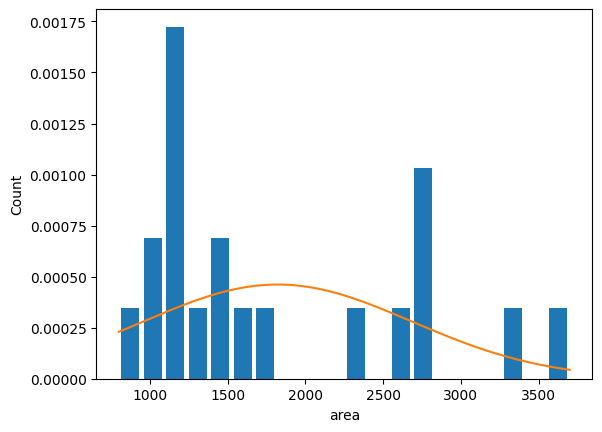

In [64]:
from scipy.stats import norm

plt.hist(df['area'],bins=20,rwidth=0.8,density=True)
plt.xlabel('area')
plt.ylabel('Count')
rng=np.arange(df['area'].min(),df['area'].max(),0.01)
plt.plot(rng,norm.pdf(rng,df['area'].mean(),df['area'].std()))

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()
x_scaled=scaler1.fit_transform(df[['area','bedrooms']])
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [66]:
y_scaled=scaler2.fit_transform(df[['price']])
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [67]:
def batch_gradient(x,y_true,epochs,learning_rate=0.01):
    number_of_features=x.shape[1]

    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=x.shape[0]

    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        y_predicted=np.dot(w,x_scaled.T)+b

        w_grad=-(2/total_samples)*x.T.dot(y_true-y_predicted)
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)


        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(y_true-y_predicted))

        if i %10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gradient(x_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

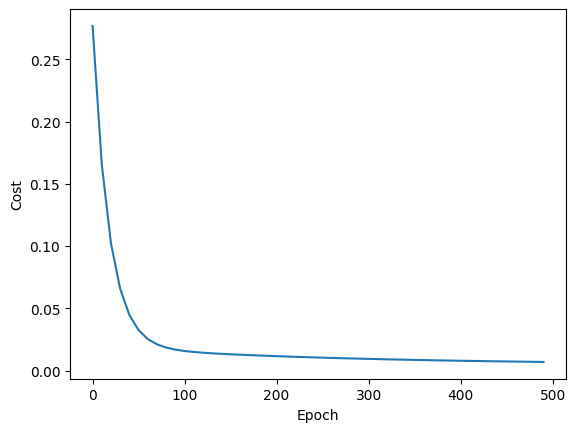

In [68]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list,cost_list)

In [85]:
def predict(area,bedroom,w,b):
    x_scaled=scaler1.transform([[area,bedroom]])[0]

    scaled_price=w[0]*x_scaled[0]+w[1]*x_scaled[1]+b
    return scaler2.inverse_transform([[scaled_price]])[0][0]


predict(2600,4,w,b)

C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596